# Logistic Regression for 2 features

the code is still incomplete it still requires feature normalization, and for some reason my cost function periodically returns a NaN value. Requires a function to plot decision boundary. I fix it soon.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
theta_final=np.array([0,0,0])
J_hist=[]

In [2]:
def getData():
    data=pd.read_csv('C:/Users/Kartikeya/Desktop/machine_learning/ex2data.csv')
    X1=np.array([data['X1']])
    X2=np.array([data['X2']])
    y=np.array([data['y']])
    return [X1,X2,y]
#ideally X1 and X2 should be sent as one matrix of X
#ideally data is to be loaded from CSV
#keeping it simple for now

def plotDataPoints(X1,X2,y):
    t=np.where(y==1)#returns array of indices
    f=np.where(y==0)
    p1=plt.scatter(X1[t],X2[t])#using feature to plot only data points corresponding to y==1
    p2=plt.scatter(X1[f],X2[f],color='r',marker='x')#y==0
    plt.grid(True)
    plt.legend((p1,p2),("Selected","Not Selected"))
    plt.xlabel("GPA of Semester 1")
    plt.ylabel("GPA of Semester 2")
    plt.title("Students selected for interview")

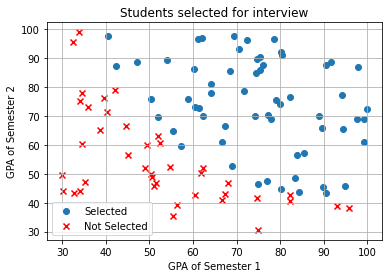

In [4]:
[X1,X2,y]=getData()
plotDataPoints(X1,X2,y)


In [5]:
def costFunction(X1,X2,y,theta):
    m=X1.size
    hx=sigmoid(X1,X2,theta) #this is to calculate cost of the function 
    J=np.sum(-y*np.log(hx)-(1-y)*np.log(1-hx))
    J=J/m
    J_hist.append(J)
    #---------------------------------------------
    X0=np.ones(m)# calculating gradient
    grad=np.array([np.sum(X0*(hx-y)),np.sum(X1*(hx-y)),np.sum(X2*(hx-y))])
    grad=grad/m
    return grad

In [6]:
def sigmoid(X1,X2,theta):
    hx=theta[0]+theta[1]*X1+theta[2]*X2
    hx=(1+np.exp(-hx))
    hx=1/hx
    return hx

In [7]:
def updateTheta(theta,max_iter,alpha):
    for iter in range(max_iter):
        theta=theta-alpha*costFunction(X1,X2,y,theta)
    return theta

In [9]:
def main():
    [X1,X2,y]=getData()
    X1=np.array(X1)
    X2=np.array(X2)
    y=np.array(y)
    plotDataPoints(X1,X2,y)
    theta=np.zeros(3)
    max_iter=1500
    alpha=0.01
    theta_final=updateTheta(theta,max_iter,alpha)

<ipython-input-5-d95afecd9b3d>:4: RuntimeWarning: divide by zero encountered in log
  J=np.sum(-y*np.log(hx)-(1-y)*np.log(1-hx))
<ipython-input-5-d95afecd9b3d>:4: RuntimeWarning: invalid value encountered in multiply
  J=np.sum(-y*np.log(hx)-(1-y)*np.log(1-hx))


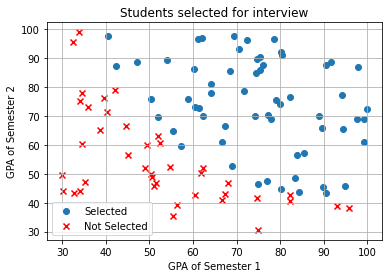

In [10]:
main()

In [11]:
J_hist

[0.6931471805599453,
 4.96059256494019,
 8.645631157161835,
 nan,
 5.7743141506583955,
 6.910900729332716,
 nan,
 6.5844707380006104,
 5.184601650203148,
 nan,
 7.3651081950366635,
 3.531917944553214,
 nan,
 7.829401246844172,
 2.5849221452548776,
 nan,
 7.0634095297108725,
 4.118087379552319,
 nan,
 7.636715070285971,
 2.944787052997654,
 nan,
 6.959618831490714,
 4.29856247043187,
 nan,
 7.47634514487649,
 3.246157621073244,
 nan,
 6.773434418779676,
 4.65284463398,
 nan,
 7.297579477429253,
 3.585170661255249,
 nan,
 6.6416411668021915,
 4.89643425544833,
 nan,
 7.124993913425737,
 3.9137317043527253,
 nan,
 6.501748694448664,
 5.158439141581441,
 nan,
 6.949766042023881,
 4.248432223367404,
 nan,
 6.372103775590117,
 5.40060873474695,
 nan,
 6.772586076850547,
 4.587750094071242,
 nan,
 6.248783082415716,
 5.630940563142377,
 nan,
 6.592518552989652,
 4.933366434294357,
 nan,
 6.131137520514444,
 5.850697996886858,
 nan,
 6.4091624348583505,
 5.286058768127617,
 nan,
 6.01754984186

In [13]:
costFunction(X1,X2,y,np.zeros(3))

array([ -0.1    , -12.00915, -11.26275])